In [47]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
import pandas as pd

plt.rcParams["figure.dpi"] = 200
plt.style.use("seaborn-v0_8")

In [13]:
old_data = [
    (4238.888885655766, 0.00033805570460468664),
    (5457.435579008047, 0.0004565890905339513),
    (10512.61038685622, 0.0009268031751636738),
    (20528.83138594145, 0.0017383690747848977),
    (30610.235204657092, 0.0026010031725310313),
    (40088.322744208876, 0.003664567097565336),
    (50221.65923191386, 0.004404466911507912),
    (70180.73078669592, 0.005968029713846599),
    (101132.57306363028, 0.008748710587424394),
    (200890.476827282, 0.01744117319567241),
    (298523.731632777, 0.02661039137811759),
    (397690.0409795278, 0.03448557910229643),
    (498216.2472957275, 0.04240680075446773),
]
old_data = np.transpose(old_data)

## Values to take data 

In [66]:
C_f = 20 #pF

In [85]:
df = pd.DataFrame()
Vins = np.logspace(np.log10(2), np.log10(0.38815334), 5)
convertIn = Vins * 100/1100 #Correction factor for resistor
df["V_in"] = convertIn #(V)
df["Q"] = convertIn*C_f  # convert to charge quantity (pC)
df["n electrons"] = convertIn*C_f * 1/(1.602e-7) #convert to number of electrons
print(f"Data data at: {Vins}")
df

Data data at: [2.         1.32746576 0.88108267 0.58480354 0.38815334]


,V_in,Q,n electrons
0,0.181818,3.636364,2.269890e+07
1,0.120679,2.413574,1.506601e+07
2,0.080098,1.601968,9.999803e+06
3,0.053164,1.063279,6.637198e+06
4,0.035287,0.705733,4.405327e+06


In [86]:
Vouts =  [1.30, 0.620, .420, .280, .150]
df["V_out"] = Vouts
df

,V_in,Q,n electrons,V_out
0,0.181818,3.636364,2.269890e+07,1.30
1,0.120679,2.413574,1.506601e+07,0.62
2,0.080098,1.601968,9.999803e+06,0.42
3,0.053164,1.063279,6.637198e+06,0.28
4,0.035287,0.705733,4.405327e+06,0.15


0.3141 +- 0.025 V/pC


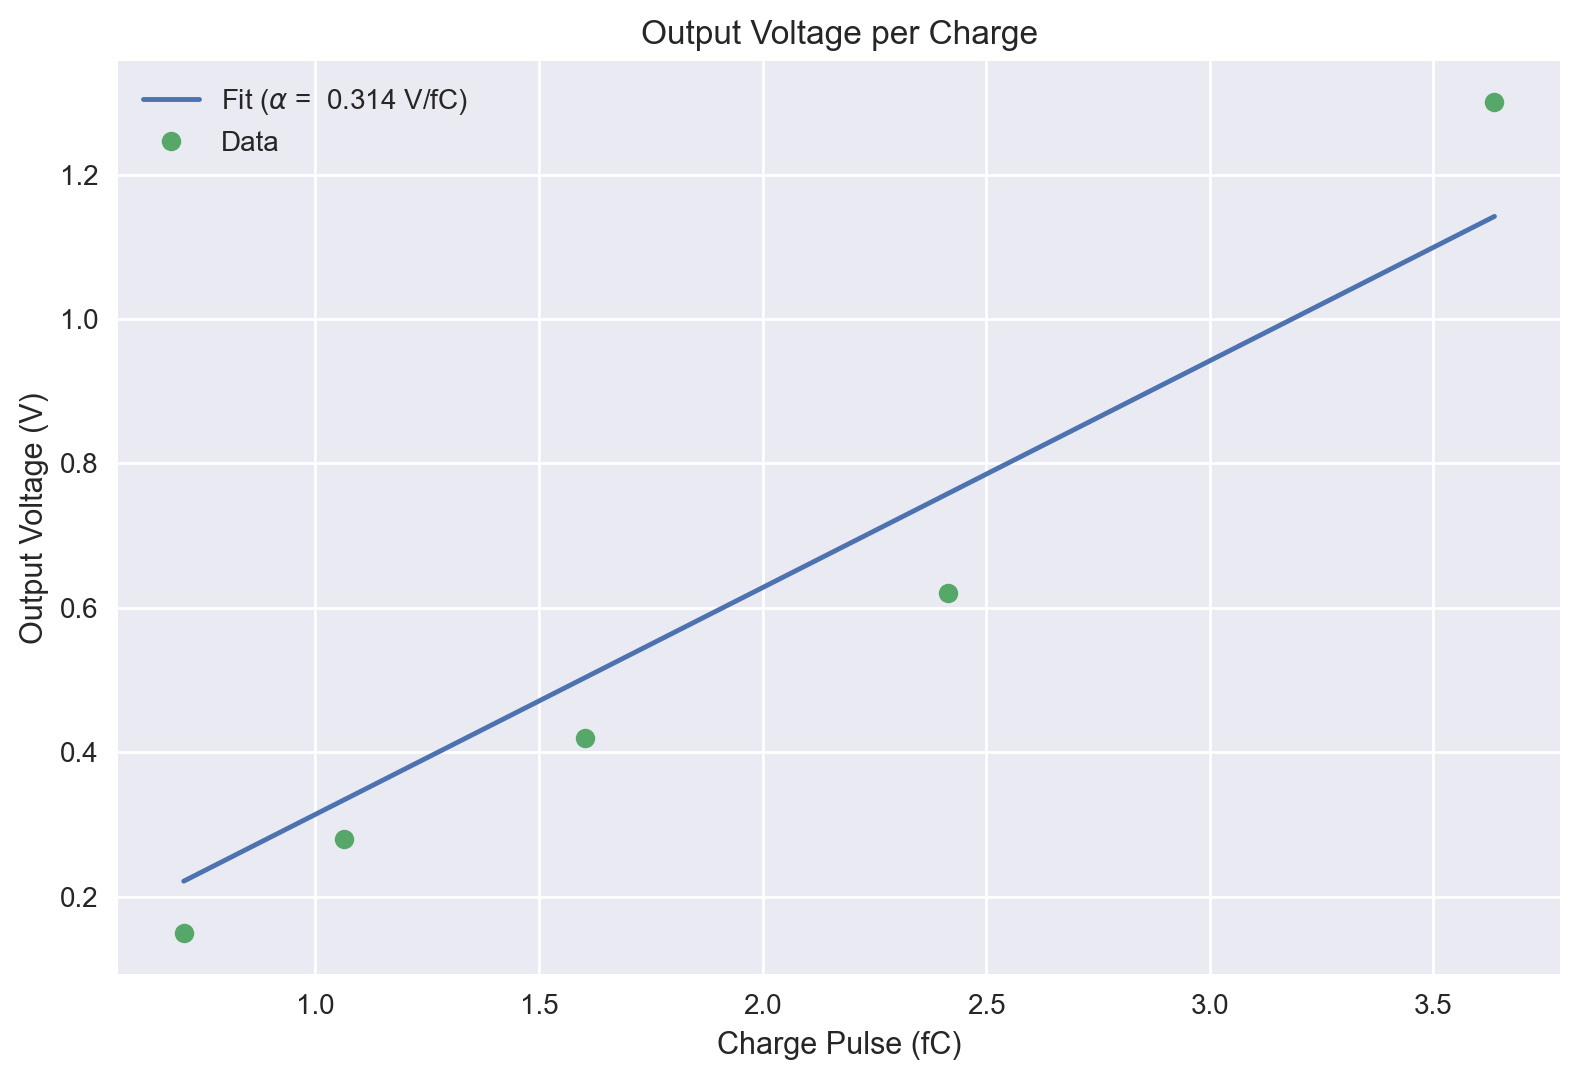

In [87]:
def fit(x, a):
    return a * x + 0


a, cov = curve_fit(fit, df["Q"], df["V_out"])
err = np.sqrt(np.diag(cov))[0]


print(f"{a[0]:.4g} +- {err:0.2g} V/pC")
#print(f"{convert*5000 :0.3g}mV per 5000 electrons")
#print(f"{1/convert: 0.0f} electrons per 1mV")
plt.plot(df["Q"], fit(df["Q"], a), label=f"Fit ($\\alpha$ = {a[0] : 0.3g} V/fC)")
plt.plot(df["Q"], df["V_out"], linestyle="none", marker="o", label="Data")
plt.legend()
plt.xlabel("Charge Pulse (fC)")
plt.ylabel("Output Voltage (V)")
plt.title("Output Voltage per Charge")
plt.tight_layout()
plt.savefig("./Write up/VperQ.png", dpi=1000)

[2.09745514e-07]


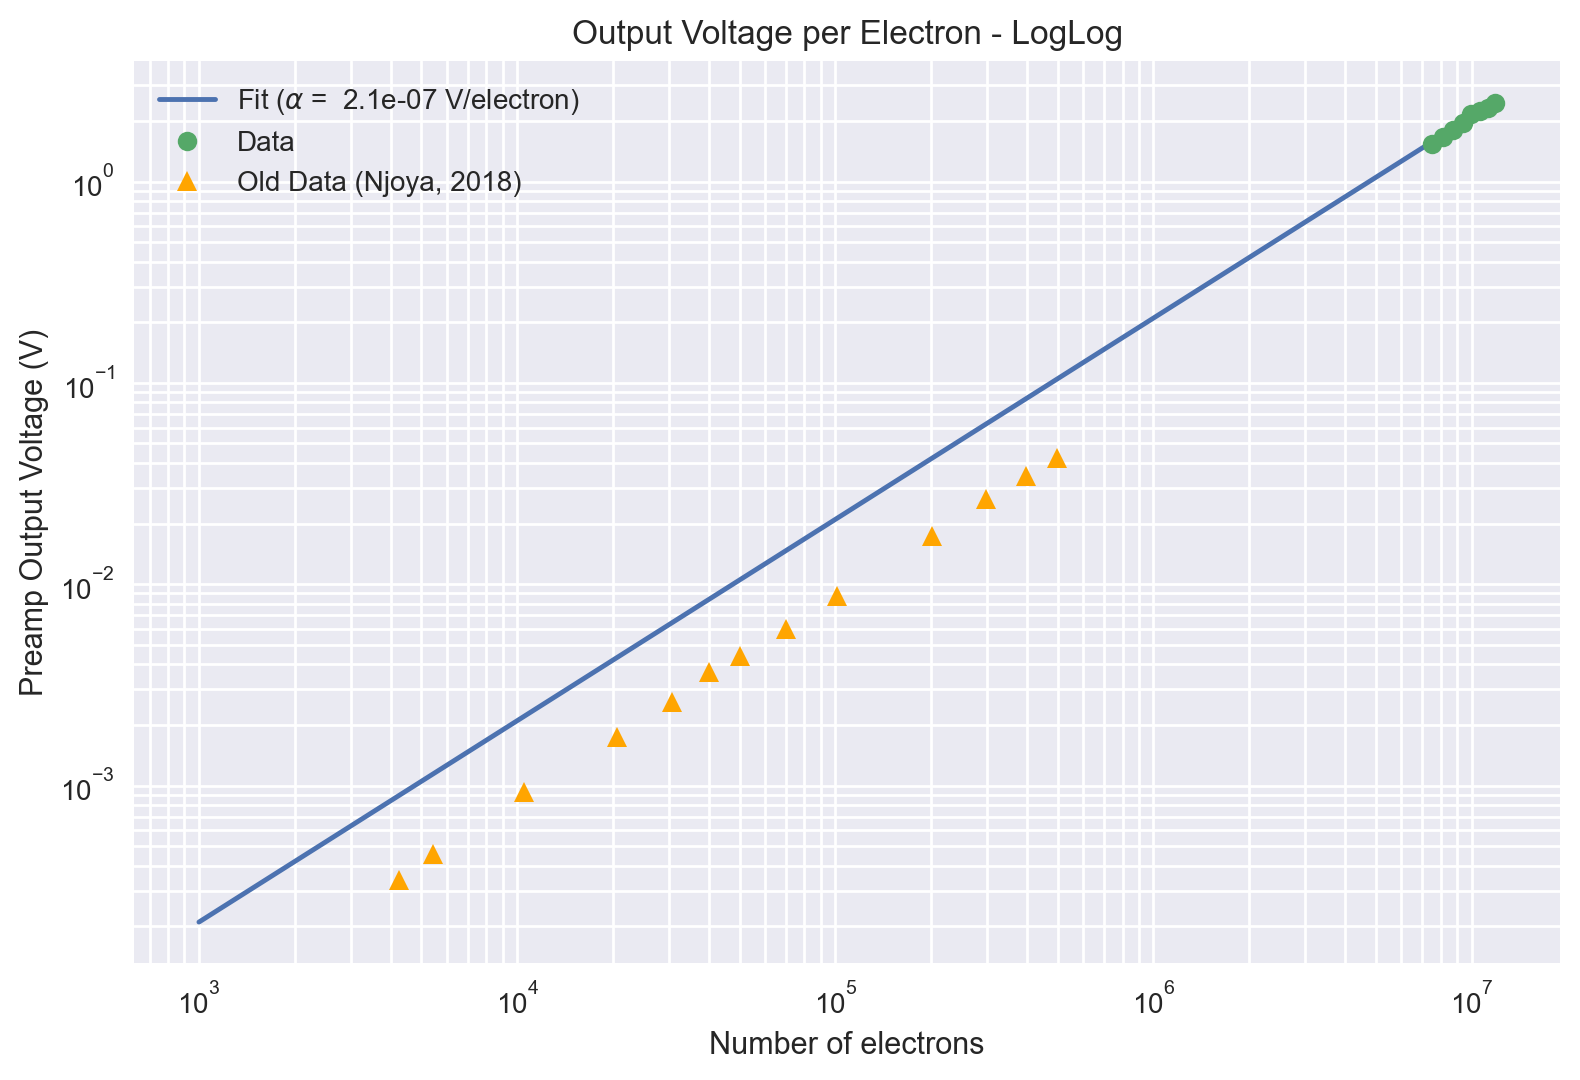

In [88]:
e = 1.602e-19
e_fc = e * 1e15 * 1e-3  # in Fc
nelectrons = qs / e_fc


def fit(x, a):
    return a * x + 0


new_axis = np.linspace(1e3, nelectrons[0], 10)
b, cov2 = curve_fit(fit, nelectrons[2:], Vs[2:])
err = np.sqrt(np.diag(cov2))[0]


plt.plot(
    new_axis,
    fit(new_axis, b),
    label=f"Fit ($\\alpha$ = {convert/1000 : 0.2g} V/electron)",
)

plt.yscale("log")
plt.xscale("log")
plt.plot(nelectrons, Vs, linestyle="none", marker="o", label="Data")
plt.plot(
    old_data[0],
    old_data[1],
    linestyle="none",
    marker="^",
    color="orange",
    label="Old Data (Njoya, 2018)",
)
plt.legend()
plt.grid(visible=True, which="both")
plt.xlabel("Number of electrons")
plt.ylabel("Preamp Output Voltage (V)")
plt.title("Output Voltage per Electron - LogLog")
plt.tight_layout()
plt.savefig("./Write up/VperN.png", dpi=1000)
print(b)

In [ ]:
.120

In [32]:
.12*10**(-.38)

0.050024326016440246

In [41]:
x = np.logspace(np.log10(.12), np.log10(.05), 10)
x

array([0.12      , 0.10887685, 0.09878474, 0.08962809, 0.08132021,
       0.0737824 , 0.0669433 , 0.06073813, 0.05510813, 0.05      ])